In [101]:
from data_loader import load_latest_iteration, load_all_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import render_particles
import os
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
from load_combined import load_combined

source_folders = [
    "../data/growth_comparison_variable_dt_1/",
    "../data/growth_comparison_variable_dt_2/",
    "../data/growth_comparison_variable_dt_3/",
    "../data/growth_comparison_variable_dt_4/",
      "../data/growth_comparison_variable_dt_5/",
        "../data/growth_comparison_variable_dt_6/",
    # "../data/lambda_scaling1/",
    # "../data/growth_comparison_variable_dt_wrong_stress/",
    # "../data/lambda_scaling1_wrong_stress/",
]

# find recursive subfolders within source_folders
sim_dirs = []
for folder in source_folders:
    for root, dirs, files in os.walk(folder):
        # skip if /data as last part of path
        if "logs" in root or "data" in root.split(os.sep)[-1]:
            continue

        if any(f.endswith(".pvtu") for f in os.listdir(root)):
            sim_dirs.append(os.path.join(root))

particles_dict, sim_dict, params_dict = load_combined(sim_dirs, offset=-0)

loading ../data/growth_comparison_variable_dt_1/vtk_output_soft_1.000000e-02
loading ../data/growth_comparison_variable_dt_1/vtk_output_soft_1.000000e-03
loading ../data/growth_comparison_variable_dt_1/vtk_output_hard_1.000000e-02
loading ../data/growth_comparison_variable_dt_1/vtk_output_soft_1.000000e-04
loading ../data/growth_comparison_variable_dt_1/vtk_output_hard_1.000000e-03
loading ../data/growth_comparison_variable_dt_1/vtk_output_hard_1.000000e-04
loading ../data/growth_comparison_variable_dt_2/vtk_output_soft_1.000000e-02
loading ../data/growth_comparison_variable_dt_2/vtk_output_soft_1.000000e-03
loading ../data/growth_comparison_variable_dt_2/vtk_output_hard_1.000000e-02
loading ../data/growth_comparison_variable_dt_2/vtk_output_soft_1.000000e-04
loading ../data/growth_comparison_variable_dt_2/vtk_output_hard_1.000000e-03
loading ../data/growth_comparison_variable_dt_2/vtk_output_hard_1.000000e-04
loading ../data/growth_comparison_variable_dt_3/vtk_output_soft_1.000000e-02

In [103]:
particles_dict

,gid,quaternion_x,quaternion_y,quaternion_z,quaternion_w,orientation_x,orientation_y,orientation_z,orientation_angle,length,...,velocity_angular_y,velocity_angular_z,rank,x,y,z,Mode,Sensitivity,sim_dir,offset
0,37024.0,-0.463945,0.0,0.0,-0.885864,-0.569510,0.821984,0.0,2.176710,1.93416,...,0.0,1473.0700,61,10.1053,61.11740,0.0,soft,$\lambda = 10^{-2}$,growth_comparison_variable_dt_1,0
1,37025.0,0.793636,0.0,0.0,-0.608393,0.259716,-0.965685,-0.0,1.833520,1.36132,...,0.0,-2030.1900,61,10.1073,-56.82650,0.0,soft,$\lambda = 10^{-2}$,growth_comparison_variable_dt_1,0
2,37026.0,-0.744479,0.0,0.0,-0.667646,0.108497,0.994097,0.0,1.462090,1.12849,...,0.0,-3415.7600,61,10.1066,10.24050,0.0,soft,$\lambda = 10^{-2}$,growth_comparison_variable_dt_1,0
3,37027.0,0.930515,0.0,0.0,-0.366253,0.731718,-0.681608,-0.0,2.391640,1.36375,...,0.0,538.1450,61,10.1132,73.55990,0.0,soft,$\lambda = 10^{-2}$,growth_comparison_variable_dt_1,0
4,37028.0,-0.749937,0.0,0.0,-0.661510,0.124810,0.992181,0.0,1.445660,1.40007,...,0.0,-95.6691,61,10.1156,-95.35280,0.0,soft,$\lambda = 10^{-2}$,growth_comparison_variable_dt_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170868,97198.0,0.864766,0.0,0.0,-0.502174,0.495642,-0.868527,-0.0,2.089370,1.06504,...,0.0,10890.2000,46,47.3930,2.35307,0.0,soft,$\lambda = 10^{-3}$,growth_comparison_variable_dt_6,0
2170869,97199.0,0.913323,0.0,0.0,-0.407236,0.668318,-0.743875,-0.0,2.302740,1.32343,...,0.0,6075.3100,46,47.3955,-39.36850,0.0,soft,$\lambda = 10^{-3}$,growth_comparison_variable_dt_6,0
2170870,97200.0,0.941955,0.0,0.0,0.335740,0.774558,0.632503,0.0,0.684781,1.08095,...,0.0,11938.1000,46,47.3982,-20.73790,0.0,soft,$\lambda = 10^{-3}$,growth_comparison_variable_dt_6,0
2170871,97201.0,0.024664,0.0,0.0,0.999696,-0.998783,0.049313,0.0,3.092260,1.04071,...,0.0,10601.9000,46,47.3972,-9.18739,0.0,soft,$\lambda = 10^{-3}$,growth_comparison_variable_dt_6,0


In [104]:
from scipy.spatial import ConvexHull
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import cKDTree
import numpy as np


def build_cell_graph(cells, distance_threshold=1.0, orientation_threshold=0.03):
    """
    Build a graph of cells where edges represent contact + orientation similarity.

    Parameters
    ----------
    cells : pd.DataFrame
        Columns: ['x', 'y', 'orientation_angle'] (0..pi)
    distance_threshold : float
        Max distance for edge
    orientation_threshold : float
        Max relative orientation difference (fraction of pi)

    Returns
    -------
    G : networkx.Graph
        Graph with nodes as cells and edges as contacts
    """
    positions = cells[['x', 'y']].values
    angles = cells['orientation_angle'].values

    tree = cKDTree(positions)
    neighbors = tree.query_pairs(r=distance_threshold)

    G = nx.Graph()
    G.add_nodes_from(range(len(cells)))

    for i, j in neighbors:
        angle_diff = abs(angles[i] - angles[j])
        angle_diff = min(angle_diff, np.pi - angle_diff)
        if angle_diff < orientation_threshold * np.pi:
            G.add_edge(i, j)

    return G, positions


def render_graph_hsv(G, positions, data, filename, clusters=None):
    pos_dict = {i: (x, y) for i, (x, y) in enumerate(positions)}
    plt.figure(figsize=(10, 10))

    if clusters is None:
        nx.draw(G, pos=pos_dict, node_size=10, node_color='skyblue',
                edge_color='gray', with_labels=False)
    else:
        # Compute average angle for each cluster
        cluster_angles = []
        cluster_color_dict = {}
        for cluster in clusters:
            angles = data.iloc[list(cluster)]['orientation_angle'].values
            mean_angle = np.mean(angles)
            cluster_angles.append(mean_angle)

        # Map mean angles to HSV hue (0..1)
        cluster_hues = np.array(cluster_angles) / np.pi  # 0..1 range

        # Assign color per node based on cluster hue
        node_colors = np.zeros((len(data), 3))
        for idx, cluster in enumerate(clusters):
            hue = cluster_hues[idx]

            rgb = mcolors.hsv_to_rgb([hue, 1.0, 1.0])  # Full saturation, value
            for node in cluster:
                cluster_color_dict[node] = rgb
                node_colors[node] = rgb

        nx.draw(G, pos=pos_dict, node_size=5, node_color=node_colors,
                edge_color='gray', with_labels=False)

        #  create new dictionary with cluster colors

    plt.gca().set_aspect('equal')
    plt.savefig(filename, dpi=300)

    if clusters is not None:
        return cluster_color_dict

    import matplotlib.pyplot as plt


def render_graph_hull(G, positions, data, filename, clusters=None, show_nodes=False):
    pos_dict = {i: (x, y) for i, (x, y) in enumerate(positions)}
    plt.figure(figsize=(10, 10))

    if clusters is None:
        nx.draw(G, pos=pos_dict, node_size=10, node_color='skyblue',
                edge_color='gray', with_labels=False)
    else:
        cluster_color_dict = {}
        for idx, cluster in enumerate(clusters):
            cluster_points = np.array([pos_dict[node] for node in cluster])

            if len(cluster_points) < 3:
                # Cannot form a convex hull with <3 points, just plot as nodes
                for node in cluster:
                    plt.scatter(*pos_dict[node], s=5, c='gray')
                continue

            # Compute average orientation angle
            angles = data.iloc[list(cluster)]['orientation_angle'].values
            mean_angle = np.mean(angles)
            hue = mean_angle / np.pi
            rgb = mcolors.hsv_to_rgb([hue, 1.0, 1.0])

            # Compute convex hull
            hull = ConvexHull(cluster_points)
            polygon = patches.Polygon(cluster_points[hull.vertices], closed=True,
                                      facecolor=rgb, edgecolor='k', alpha=0.5)
            plt.gca().add_patch(polygon)

            # Store cluster color
            for node in cluster:
                cluster_color_dict[node] = rgb

        if show_nodes:
            # Optionally overlay nodes on top
            for node, (x, y) in pos_dict.items():
                plt.scatter(x, y, s=5, c='black')

    plt.gca().set_aspect('equal')
    plt.savefig(filename, dpi=300)

    if clusters is not None:
        return cluster_color_dict


def render_graph_hull(G, positions, data, filename, clusters=None, show_nodes=True):
    pos_dict = {i: (x, y) for i, (x, y) in enumerate(positions)}
    plt.figure(figsize=(10, 10))

    if clusters is None:
        nx.draw(G, pos=pos_dict, node_size=10, node_color='skyblue',
                edge_color='gray', with_labels=False)
    else:
        cluster_color_dict = {}
        for idx, cluster in enumerate(clusters):
            cluster_points = np.array([pos_dict[node] for node in cluster])

            if len(cluster_points) < 3:
                # Cannot form a convex hull with <3 points, just plot as nodes
                for node in cluster:
                    plt.scatter(*pos_dict[node], s=5, c='gray')
                continue

            # Compute average orientation angle
            angles = data.iloc[list(cluster)]['orientation_angle'].values
            mean_angle = np.mean(angles)
            hue = mean_angle / np.pi
            rgb = mcolors.hsv_to_rgb([hue, 1.0, 1.0])

            # Compute convex hull
            hull = ConvexHull(cluster_points)
            polygon = patches.Polygon(cluster_points[hull.vertices], closed=True,
                                      facecolor=rgb, edgecolor='k', alpha=0.5)
            plt.gca().add_patch(polygon)

            # Store cluster color
            for node in cluster:
                cluster_color_dict[node] = rgb

        if show_nodes:
            # Optionally overlay nodes on top
            for node, (x, y) in pos_dict.items():
                plt.scatter(x, y, s=5, c='black')

    plt.gca().set_aspect('equal')
    plt.savefig(filename, dpi=300)

    if clusters is not None:
        return cluster_color_dict

In [105]:
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import seaborn as sns

MODE_COLORS = {"hard": "blue", "soft": "orange", "Weady et al.": "black"}
LINE_STYLES = {"$\\lambda = 10^{-2}$": "solid",
               "$\\lambda = 10^{-3}$": "dashed", "$\\lambda = 10^{-4}$": "dotted"}


In [106]:
def makeplot(data, x, y, xlabel=None, ylabel=None, outname=None, variable="density",
             xscale=None, yscale=None,
             **kwargs):

    fig, ax = plt.subplots(figsize=(10, 6))
    outname = outname or f"{y}_vs_{x}.png"

    sns.lineplot(data, x=x,                 y=y,
                 hue="Mode", marker="o", ax=ax, **kwargs, lw=2, ms=10)

    if xscale:
        ax.set_xscale(xscale, base=2)
    if yscale:
        ax.set_yscale(yscale, base=2)

    ax.set_xlabel(xlabel or x, fontsize=20)
    ax.set_ylabel(ylabel or y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True)
    ax.legend(fontsize=22)

    if outname:
        fig.savefig(outname, dpi=300, bbox_inches="tight")

In [107]:
from render_particles import draw_particles_cluster


def plot_orientation_distribution(particles, filename):

    fig, ax = plt.subplots(figsize=(10, 6))
    particles["orientation_angle"].plot.hist(bins=25,
                                             color='gray', edgecolor='black', density=True)

    # put 0 pi/2 and pi as x axis ticks
    ax.set_xticks([0, np.pi/2, np.pi], ['0', 'π/2', 'π'])

    ax.set_xlabel("Orientation Angle (radians)", fontsize=20)
    ax.set_ylabel("Frequency", fontsize=20)

    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    ax.legend(fontsize=16)

    fig.savefig(filename, dpi=300)


def spherocylinder_area(length,  radius=0.25):
    """
    Calculate projected area of a spherocylinder
    Area = rectangle + 2 semicircles = 2*r*L + π*r²
    """
    return 2 * radius * (length-2*radius) + np.pi * radius**2

0.5**2*np.pi+(1-0.5) * 0.5


def Pa(A, A_star):
    return 0.1*np.exp(-A / A_star)


def plot_cluster_area_kde(particles, clusters, filename):
    fig, ax = plt.subplots(figsize=(10, 6))

    cluster_areas = []
    for cluster in clusters:
        cluster_lengths = particles.iloc[cluster]['length']
        cluster_areas.append(sum(spherocylinder_area(l)
                             for l in cluster_lengths))

    cluster_series = pd.Series(cluster_areas)

    x = np.linspace(cluster_series.min(), cluster_series.max(), 100)

    cluster_series.plot.kde()
    plt.plot(x, Pa(x, 20.0), label='A* = 20.0', color='red', linewidth=2)

    ax.set_xlim(cluster_series.min(), cluster_series.max())
    ax.set_ylim(1e-6, None)

    # log scale x axis
    ax.set_yscale('log')

    ax.set_xlabel("Cluster Area", fontsize=20)
    ax.set_ylabel("Probability Density", fontsize=20)

    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    ax.grid(True)
    ax.legend(fontsize=16)

    fig.savefig(filename, dpi=300)


def plot_cluster_area_distribution(particles, clusters, filename):
    fig, ax = plt.subplots(figsize=(10, 6))

    # determine average length per cluster
    cluster_areas = []
    for cluster in clusters:
        cluster_lengths = particles.iloc[cluster]['length']
        cluster_areas.append(sum(spherocylinder_area(l)
                             for l in cluster_lengths))

    # plot probability distribution of cluster areas
    ax.hist(cluster_areas, bins=30, color='gray',
            edgecolor='black', density=True)

    ax.set_yscale('log')

    ax.set_xlabel("Cluster Area", fontsize=20)
    ax.set_ylabel("Probability Density", fontsize=20)

    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    ax.legend(fontsize=16)

    fig.savefig(filename, dpi=300)

In [108]:
particles_dict['area'] = particles_dict['length'].apply(spherocylinder_area)

In [109]:
updated_particles_dict = []

for key, particles in particles_dict.groupby(["Mode", "Sensitivity", "sim_dir", "offset"]):
    print(f"Processing {key}")

    G, positions = build_cell_graph(
        particles, distance_threshold=2.2, orientation_threshold=0.03)

    clusters = [list(c) for c in nx.connected_components(G)]
    # add cluster field to each particle

    for cluster_id, cluster in enumerate(clusters):
        particles.loc[particles.index[cluster], 'cluster'] = cluster_id

    updated_particles_dict.append(particles)

    # save graph
    # try:
    #     render_graph_hull(G, positions, particles,
    #                     filename=f"graph_{key[0]}_{key[1]}_{key[2]}_hull.png",
    #                     clusters=clusters)
    # except Exception as e:
    #     print(f"Error rendering graph for {key}: {e}")

particles_dict = pd.concat(updated_particles_dict, ignore_index=True)

Processing ('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_1', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_2', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_3', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_4', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_5', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_6', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_1', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_2', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_3', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_4', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_5', n

In [111]:


clusters = []
for key, particles in particles_dict.groupby(["Mode", "Sensitivity",  "sim_dir", "offset"]):
    print(key)

    # calculate total cluster area per cluster
    cluster_summary = (
        particles.groupby('cluster')
        .agg(
            total_area=('area', 'sum'),
            center_x=('x', 'mean'),
            center_y=('y', 'mean'),
            center_z=('z', 'mean'),
            count=('gid', 'count'),
            mode=('Mode', 'first'),
            sensitivity=('Sensitivity', 'first'),
        )
        .reset_index())
    cluster_summary['radius'] = np.sqrt(
        cluster_summary['center_x']**2 + cluster_summary['center_y']**2)

    clusters.append(cluster_summary)

clusters = pd.concat(clusters, ignore_index=True)

('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_1', np.int64(0))
('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_2', np.int64(0))
('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_3', np.int64(0))
('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_4', np.int64(0))
('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_5', np.int64(0))
('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_6', np.int64(0))
('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_1', np.int64(0))
('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_2', np.int64(0))
('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_3', np.int64(0))
('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_4', np.int64(0))
('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_5', np.int64(0))
('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_6', np.int64(0))
('hard', '$\\lambda = 10^{-4

In [112]:
0.5**2*np.pi+(1-0.5) * 0.5

1.0353981633974483

In [113]:
clusters["total_area"].min()

np.float64(0.4369235408493621)

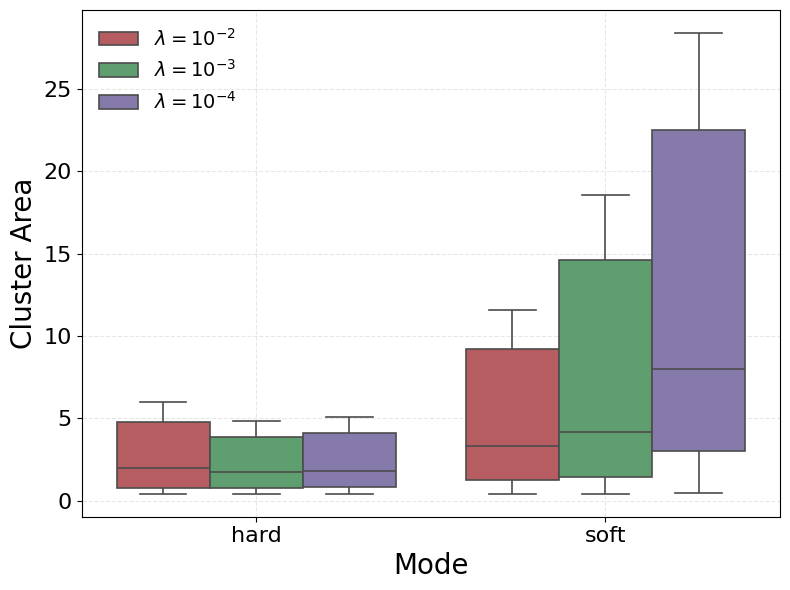

In [138]:

MODE_COLORS_SENS = {
    r"$\lambda = 10^{-2}$": "#C44E52",
    r"$\lambda = 10^{-3}$": "#55A868",
    r"$\lambda = 10^{-4}$": "#8172B2",
}


fig, ax = plt.subplots(figsize=(8, 6))

# --- Main plot ---
sns.boxplot(
    data=clusters,
    x="mode",
    y="total_area",
    hue="sensitivity",
    showfliers=False,
    palette=MODE_COLORS_SENS,
    linewidth=1.2,
    whis=0.3,
    ax=ax
)

# --- Custom legend (mimicking your reference style) ---
fig = ax.get_figure()
leg = fig.legend()  # create a temporary legend to grab handles/labels
handles = leg.legend_handles
labels = [h.get_label() for h in handles]
leg.remove()  # remove temporary legend

# Insert an empty placeholder (for spacing)
labels.insert(3, "")
handles.insert(3, plt.Line2D([], [], color='none'))

# Recreate clean custom legend
ax.legend(
    handles,
    labels,
    fontsize=14,
    frameon=False,
    loc="best",
)

# --- Axes formatting ---
# ax.set_yscale("log")  # optional but helpful for skewed area distributions
ax.set_xlabel("Mode", fontsize=20)
ax.set_ylabel("Cluster Area", fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid(True, which="both", ls="--", alpha=0.3)

fig.tight_layout()
fig.savefig("cluster_area_boxplot.png", dpi=300)
plt.show()

In [115]:
import numpy as np
import pandas as pd

# Choose bins (linear or log, depending on your data)
r_bins = np.arange(clusters["radius"].min(), clusters["radius"].max(), 4)
clusters["r_bin"] = pd.cut(clusters["radius"], bins=r_bins)

# Aggregate per bin, mode, and sensitivity
binned_stats = (
    clusters.groupby(["r_bin", "mode", "sensitivity"])
    .agg(
        mean_area=("total_area", "mean"),
        median_area=("total_area", "median"),
        std_area=("total_area", "std"),
        count=("total_area", "count"),
        r_center=("radius", "mean"),
    )
    .reset_index()
)


/tmp/ipykernel_1685638/1932684697.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clusters.groupby(["r_bin", "mode", "sensitivity"])


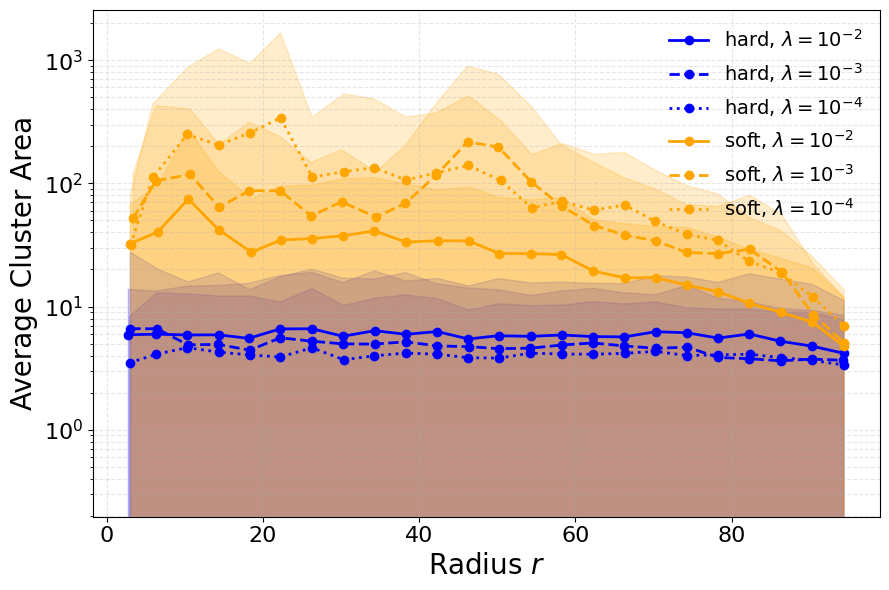

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(9,6))

for (mode, sens), d in binned_stats.groupby(["mode", "sensitivity"]):
    ax.plot(
        d["r_center"],
        d["mean_area"],
        lw=2,
        color=MODE_COLORS.get(mode, "gray"),
        linestyle=LINE_STYLES.get(sens, "solid"),
        marker="o",
        ms=6,
        label=f"{mode}, {sens}"
    )
    # Optional: error bars
    ax.fill_between(
        d["r_center"],
        d["mean_area"] - d["std_area"],
        d["mean_area"] + d["std_area"],
        color=MODE_COLORS.get(mode, "gray"),
        alpha=0.2
    )

ax.set_xlabel("Radius $r$", fontsize=20)
ax.set_ylabel("Average Cluster Area", fontsize=20)
ax.set_yscale("log")
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid(True, which="both", ls="--", alpha=0.3)

ax.legend(fontsize=14, frameon=False)
fig.tight_layout()
plt.show()


/tmp/ipykernel_1685638/2336516265.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clusters['r_bin_center'] = clusters.groupby('r_bin')['radius'].transform('mean')


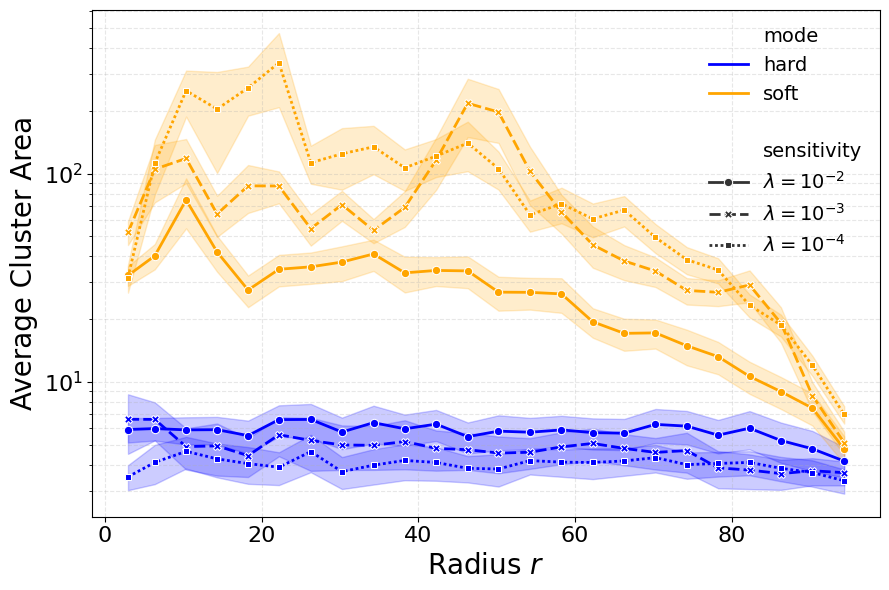

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure binned radius is numeric (midpoint of bins)
clusters['r_bin_center'] = clusters.groupby('r_bin')['radius'].transform('mean')

fig, ax = plt.subplots(figsize=(9,6))

sns.lineplot(
    data=clusters,
    x='r_bin_center',
    y='total_area',
    hue='mode',
    style='sensitivity',
    markers=True,
    dashes=True,
    palette=MODE_COLORS,
    errorbar=('sd',  0.1),
    lw=2,
    ms=6,
    ax=ax
)

# Axes formatting
ax.set_xlabel("Radius $r$", fontsize=20)
ax.set_ylabel("Average Cluster Area", fontsize=20)
ax.set_yscale("log")  # useful for skewed areas
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid(True, which='both', ls='--', alpha=0.3)

# Custom legend like your other plots
fig = ax.get_figure()
leg = fig.legend()
handles = leg.legend_handles
labels = [h.get_label() for h in handles]
leg.remove()

# Optional spacing line
labels.insert(3, "")
handles.insert(3, plt.Line2D([], [], color='none'))
ax.legend(handles, labels, fontsize=14, frameon=False)

fig.tight_layout()
plt.show()
